In [1]:
import numpy as np
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt

from numpy import arange
from scipy.integrate import odeint
from scipy import optimize
from scipy import misc

In [2]:
# parameters
m = 100                               #GeV DM Mass
Mp = 1.22e19                            #GeV Planck Mass

In [3]:
from scipy import integrate

# The function "integrate.odeint" Integrate a system of ordinary differential equations.

#DESCRIPTION
# scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, 
# rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, 
# mxords=5, printmessg=0, tfirst=False)

# func : callable(y, t, …) or callable(t, y, …)
# Computes the derivative of y at t. If the signature is callable(t, y, ...), 
# then the argument tfirst must be set True.

# y0 : array
# Initial condition on y (can be a vector).

# t :array
# A sequence of time points for which to solve for y. The initial value point should be the first element of this
#sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.

#************
# So basically the first parameter is the function to integrate, dY/dx in our case, the second argument is 
# the starting point, and the third is the variable you want to integrate into.
#************

In [4]:
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)

In [5]:
global k
k=1
fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*sigmav#*m  #starting to build the dY/dx

def BEx(x,m=100):
    #T=m/x
    return k/x**2   #missing piece of the formula g_good(T).

In [6]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)   #putting together the things to have the right formula

#THESE FUNCTIONS HAVE BEEN CREATED TO ACHIVE THE COMPLETE FORMULA FOR THE dY/dx

In [7]:
def BE1(poi,x):
    Y2, Y1=poi
    return [-k*m1*(Y1*Y2-Yeq(x)**2)/x**2 + ks*m1*Yeq(x)*(Y2-Y1)/x**2 + x*kd*m1*(Y2-Y1), -k*m1*(Y1*Y2-Yeq(x)**2)/x**2 + ks*m1*Yeq(x)*(Y2-Y1)/x**2 + x*kd*m1*(Y2-Y1)] 

#There should be Yeq1 e Yeq2 but I don't know how to express them
#also the cross sections need to be different one from the other in principle..

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


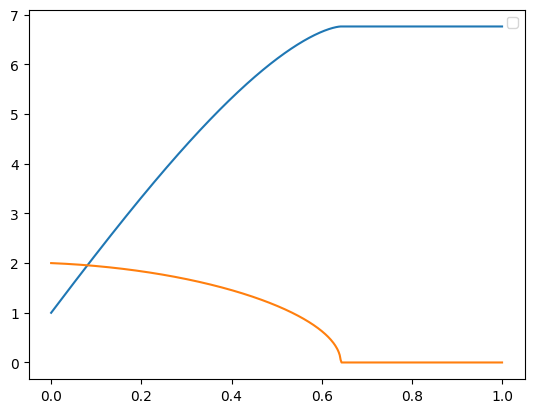

In [8]:
#USEFUL EXAMPLE

def func(z,t):
    o, q=z
    #print (t,z)
    return [6*q, (2*t-3*o)*q/(4*q**2+1e-12)]    

z0=[1,2]
t = np.linspace(0,1,501)
xx=odeint(func, z0, t)
plt.figure(1)
plt.plot(t, xx[:,0],t,xx[:,1])
plt.legend()
plt.show()

$$ \frac{dY_{1,2}}{dx} = - \frac{\lambda_A}{x^2} \Big[ Y_1 Y_2 - Y_1^{(0)}Y_2^{(0)} \Big] \pm x \lambda_D \Big( Y_2- \frac{Y_2^{(0)}}{Y_1^{(0)}}Y_1 \Big) \pm \frac{\lambda_S}{x^2}Y_f^{(0)} \Big( Y_2- \frac{Y_2^{(0)}}{Y_1^{(0)}}Y_1 \Big) $$
Let's try at the beginning to consider just the first two terms

In [9]:
def BEx2(x,m=100):
    #T=m/x
    return k*x

In [10]:
def BE2(poi,x):
    Y2, Y1=poi
    return [-(Y1*Y2-Yeq(x)**2)*BEx(x)+BEx2(x)*(Y2 - Y1)*0.0001, -(Y1*Y2-Yeq(x)**2)*BEx(x)-BEx2(x)*(Y2 -Y1)*0.0001 ]

# HERE I SHOULD HAVE INSERT Y20 AND Y10 IN A DIFFERENT WAY BUT I HAVE TO FIGURE OUT HOW
# ALSO THE CROSS SECTIONS (LAMBDAS) MUST BE DIFFERENT!!

/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_10844/2909235415.py:3: RuntimeWarning: overflow encountered in double_scalars
  return [-(Y1*Y2-Yeq(x)**2)*BEx(x)+BEx2(x)*(Y2 - Y1)*0.0001, -(Y1*Y2-Yeq(x)**2)*BEx(x)-BEx2(x)*(Y2 -Y1)*0.0001 ]


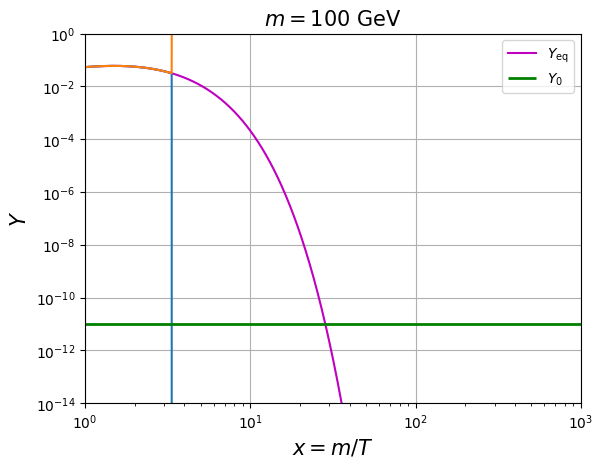

In [11]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')


k=fk(sigmav=1E-12)       # AFTER 1E-12 EXPLODES
x=np.logspace(np.log10(1),np.log10(1000),10000)
z0=[Yeq(x[0]), Yeq(x[0])]

Y=integrate.odeint(BE2, z0, x)
#plt.loglog(x,Y,'k:')

plt.plot(x, Y[:,0],x,Y[:,1])


plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()


$$ \frac{dY_{1,2}}{dx} = - \frac{\lambda_A^{12}}{x^2} \Big[ Y_1 Y_2 - Y_1^{(0)}Y_2^{(0)} \Big] -\frac{\lambda_A^{11,22}}{x^2} \Big[ Y_{1,2}^2 -(Y_{1,2}^0)^2 \Big] +[...] $$ Plus other therms, but now let's keep it easy

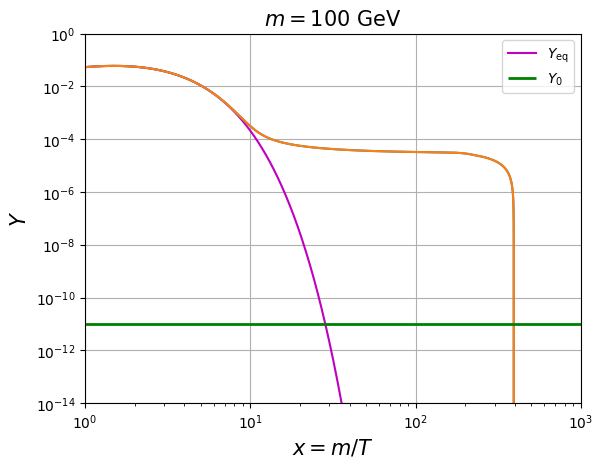

In [27]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')


k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
z0=[Yeq(x[0]), Yeq(x[0])]

Y=integrate.odeint(BE1, z0, x)
#plt.loglog(x,Y,'k:')

plt.plot(x, Y[:,0],x,Y[:,1])


plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

#Okay, this program is actually solving a system of two differential equations, but I gave him the same two, so
#they are actually one over the other.

In [13]:
def odes(x,t):
    #constants
    a1=3e5
    a2=0.2
    a3=4e-7
    a4=0.6
    a5=8
    a6=90
    
    #assigng each ODE to a vector element
    A=x[0]
    B=x[1]
    C=x[2]
    
    #define each ODE
    dAdt= a1-a2*A-a3*A*C
    dBdt=a3*A*C-a4*B
    dCdt=-a3*A*C-a5*C+ a6*B
    
    return [dAdt, dBdt, dCdt]
    

In [14]:
#initial condition
x0=[2e6,0,90]

In [15]:
t=np.linspace(0,15,1000)

In [16]:
x=odeint(odes,x0,t)

In [17]:
A=x[:,0]
B=x[:,1]
C=x[:,2]

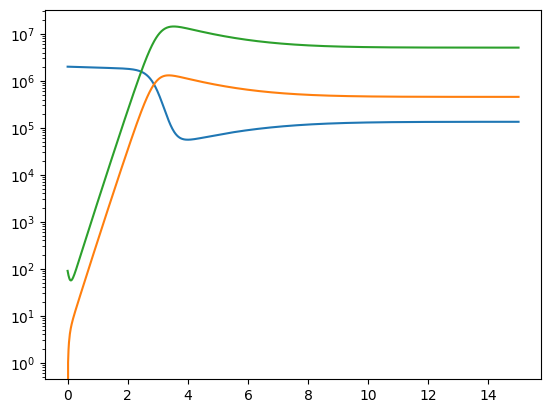

In [18]:
plt.semilogy(t,A)
plt.semilogy(t,B)
plt.semilogy(t,C)
plt.show()

In [32]:
m1=100
m2=100.001
Mp = 1.22e19 

In [33]:
def odesiDM(x,t):
    #constants
    m1=100
    m2=200.001
    Mp = 1.22e19 
    
    #assigng each ODE to a vector element
    Y1=x[0]
    Y2=x[1]
    
    
    #define each ODE
    dY1dt= -k*m1*(Y1*Y2-Yeq(t)**2)/t**2 + ks*m1*Yeq(t)*(Y2-Y1)/t**2 #+ t*kd*m1*(Y2-Y1)
    dY2dt= -k*m2*(Y1*Y2-Yeq(t)**2)/t**2 - ks*m2*Yeq(t)*(Y2-Y1)/t**2 #- t*kd*m2*(Y2-Y1)
    
    return [dY1dt, dY2dt]


# fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*sigmav
# k= fk(cross section)

In [34]:
global ks
ks=1
global kd
kd=1

In [35]:
k=fk(sigmav=1E-15)

ks=fk(sigmav=1E-13)
kd=fk(sigmav=1E-15)

In [36]:
#initial condition
x0=[Yeq(t[0]),Yeq(t[0])]

In [37]:
t=np.linspace(1,1000,100000)

In [38]:
x=odeint(odesiDM,x0,t,hmax=0.003)

In [39]:
Y1=x[:,0]
Y2=x[:,1]

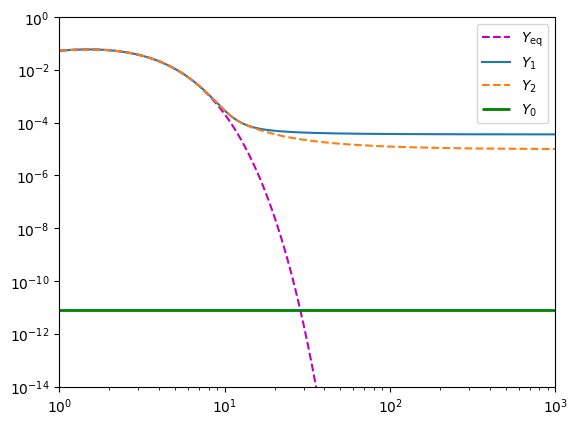

In [40]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m--',label=r'$Y_{\rm eq}$')

plt.loglog(t,Y1,label=r'$Y_{1}$')
plt.loglog(t,Y2,'--',label=r'$Y_{2}$')

plt.hlines(7.8*1E-12,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')


plt.legend()
plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.show()

In [29]:
print(len(x))


10000


In [30]:
def BE1(poi,x):
    Y2, Y1=poi
    return [-k*m1*(Y1*Y2-Yeq(x)**2)/x**2 + ks*m1*Yeq(x)*(Y2-Y1)/x**2 + x*kd*m1*(Y2-Y1), -k*m1*(Y1*Y2-Yeq(x)**2)/x**2 + ks*m1*Yeq(x)*(Y2-Y1)/x**2 + x*kd*m1*(Y2-Y1)] 

#There should be Yeq1 e Yeq2 but I don't know how to express them
#also the cross sections need to be different one from the other in principle..

KeyboardInterrupt: 

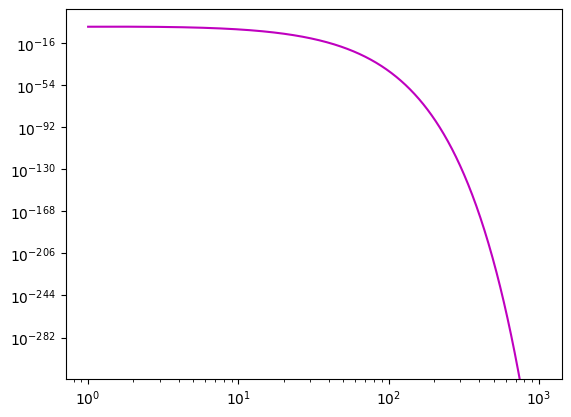

In [31]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')


k=fk(sigmav=1E-15)
x=np.linspace(1,1000,100000)
z0=[Yeq(x[0]), Yeq(x[0])]

Ya=integrate.odeint(BE1, z0, x,hmax=0.00003)
#plt.loglog(x,Y,'k:')

plt.plot(x, Ya[:,0],x,Ya[:,1])


plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

#Okay, this program is actually solving a system of two differential equations, but I gave him the same two, so
#they are actually one over the other.

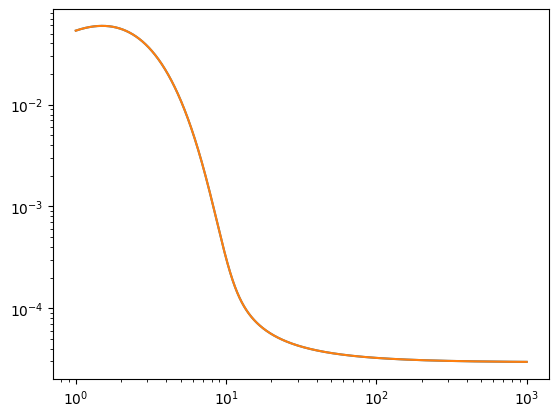

In [434]:
plt.loglog(x,Ya[:,0])
plt.loglog(x,Ya[:,1])